# temp

temporary notebook for testing

im in pain

In [1]:
%matplotlib inline

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from parcels import FieldSet, ParticleSet

from utils import get_file_info, load_config, xr_dataset_to_fieldset

In [3]:
configs = [
    "parcels_configs/tijuana_lin_cfg.json",
    "parcels_configs/tijuana_lin_aggr_cfg.json"
]

loaded_configs = [load_config(path) for path in configs]
files = [get_file_info(cfg["name"], cfg["netcdf_path"], cfg["resolution"], cfg["parcels_config"]) for cfg in loaded_configs]

In [4]:
indices = []
diff_u = files[0]["xrds"]["u"] - files[1]["xrds"]["u"]
for i in range(diff_u.shape[0]):
    mi = diff_u.isel(time=i).min().values
    ma = diff_u.isel(time=i).max().values
    if mi != 0 or ma != 0:
        indices.append(i)
boy10 = diff_u.isel(time=10)
boy11 = diff_u.isel(time=11)
print(np.where(boy10<0))

temp = files[0]["xrds"].assign(u=diff_u)
diff_fs = xr_dataset_to_fieldset(temp)
diff_fs.U[3600 * 10, 0, boy10.coords["lat"][7].values, boy10.coords["lon"][12].values]

(array([ 5,  5,  7,  7,  7,  8,  9, 10, 11, 12, 13]), array([12, 13, 11, 12, 13, 13, 13, 11, 11, 11, 11]))


-2.4212473851978907e-06

## wow parcels

as it turns out you could have staggered data that goes [[1,0,1,0],[0,1,0,1]] and you do decide to show it on a fieldset parcels plots it all as FUCKING 0

/Users/jerry/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/jerry/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


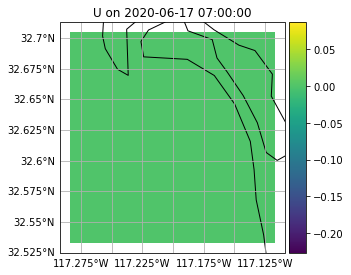

In [5]:
diff_fs.U.show(show_time=10*3600)

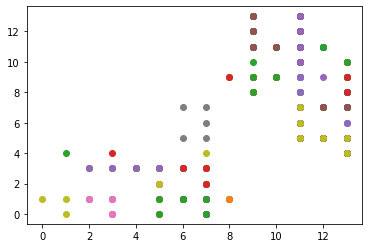

In [6]:
for i in indices:
    dude = diff_u.isel(time=i)
    dude.values[np.where(np.isnan(dude))] = 0
    x = np.where(dude != 0)
    plt.scatter(x[1], x[0])
plt.show()